<a href="https://colab.research.google.com/github/ubuntumel/AI_Colab_Projects/blob/main/(Linear_Regression)AbaloneFinalProj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import core data handling librariers
import pandas as pd # Pandas is used for working with tabular data
import numpy as np  # NumPy is used for numerical operations

# Import preprocessing tools from scikit-learn
# MinMaxScaler scales features to a given range 0 to 1
# StandardScaler standardizes features
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Import visualization libraries
import seaborn as sns # Import Seaborn for statistical plots
import matplotlib.pyplot as plt # Import Matplotlib for plotting

# Install the ucimlrepo package, fetches datasets from the UCI repo
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# Fetch the Abalone dataset uci dataset id = 1
# Downloads metadata, features, and target values
abalone = fetch_ucirepo(id=1)

# Extract the feature matrix independent variables
# The dataset stores features as a pandas DataFrame inside abalone.data.features
X = abalone.data.features

# Extract the target dependent variables
# The dataset stores targets inside abalone.data.targets
y = abalone.data.targets

# For inspecting metadata and variable descriptions
# print(abalone.metadata)
# print(abalone.variables)

# Display the features DataFrame
print(X)
# Display the targets DataFrame
print(y)

     Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  
0             0.1010        0.1500  
1             0.0485        0.0700  
2             0.1415        0.2100  
3             0.1140        0.1550 

In [ ]:
# Import the os module to interact with the operating system
import os

# Path defined with the file to check, just in case the uci repo is down
path = "/content/drive/MyDrive/CS471/AbaloneData/abalone.data"

# Print whether the file exists at the specified path
print("Exists:", os.path.exists(path))

# If the file exists, print its size in bytes else print NA.
if os.path.exists(path):
    print("Size (bytes):", os.path.getsize(path))
else:
    print("Size (bytes): N/A")

Exists: False
Size (bytes): N/A


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import csv # import csv for reading and writing csv files

# Mount the goggle drive to access the files stored there as a backup
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


# The original path variable is no longer needed as we are using the already loaded data.
# path = "/content/drive/MyDrive/CS471/AbaloneData/abalone.data"

# defined custom column names that match the attributes of the Abalone dataset
Header = [
            'Sex',                     # Categorical variable Male Female Infant
            'Length_MM',               # Longest shell measurement
            'Diameter_MM',             # Perpendicular to lenght
            'Height_MM',               # Height with shell on
            'Whole_weight_GRAMS',      # Weight of whole abalone
            'Shucked_weight_GRAMS',    # Weight of shucked meat
            'Viscera_weight_GRAMS',    # Gut weight after bleeding
            'Shell_weight_Grams',      # Dry shell weight
            'Rings'                    # target variable Number of rings = age
            ]

# Construct df from the already loaded X and y DataFrames
# axis = 1 ensures they are concatenated horizontally
df = pd.concat([X, y], axis=1)
# Apply the custom header names
df.columns = Header
# Display the first few rows to verify dataset looks the way we want it to.
df.head()

Mounted at /content/drive


,Sex,Length_MM,Diameter_MM,Height_MM,Whole_weight_GRAMS,Shucked_weight_GRAMS,Viscera_weight_GRAMS,Shell_weight_Grams,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
# performing manual encoding in order to encode data without causing data leakage
# Male = 1, Female = 0 and Infant = 2
# This converts the text categories tinto numeric values so they can be used the machine learning models
df["Sex"] = df["Sex"].map({"M": 1, "F": 0, "I": 2})


In [ ]:
#Checking to see if there are any NULL values
print("Null values in the entire DataFrame:")
# df.isnull() returns a Dataframe of the same shape with true or false
print(df.isnull())

# Checking for impossible or invalid values like the Abalone height could never be 0 or negative
# filters rows where height_mm <= 0
print("\nimposible values:")
df[df["Height_MM"] <= 0]


Null values in the entire DataFrame:
        Sex  Length_MM  Diameter_MM  Height_MM  Whole_weight_GRAMS  \
0     False      False        False      False               False   
1     False      False        False      False               False   
2     False      False        False      False               False   
3     False      False        False      False               False   
4     False      False        False      False               False   
...     ...        ...          ...        ...                 ...   
4172  False      False        False      False               False   
4173  False      False        False      False               False   
4174  False      False        False      False               False   
4175  False      False        False      False               False   
4176  False      False        False      False               False   

      Shucked_weight_GRAMS  Viscera_weight_GRAMS  Shell_weight_Grams  Rings  
0                    False                 F

,Sex,Length_MM,Diameter_MM,Height_MM,Whole_weight_GRAMS,Shucked_weight_GRAMS,Viscera_weight_GRAMS,Shell_weight_Grams,Rings
1257,2,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,2,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In [ ]:
# Remove rows where Height_mm is 0 or negative
# since those values are physically impossible for abalones
df = df[df["Height_MM"] > 0]

# Display the new shape of the DataFrame after removing invalid values
df.shape

(4175, 9)

In [ ]:
#confirming removal of impossible height values <=0
# If the cleaning was successful, this returns an empty dataframe
print("\nimposible values:")
df[df["Height_MM"] <= 0]


imposible values:


,Sex,Length_MM,Diameter_MM,Height_MM,Whole_weight_GRAMS,Shucked_weight_GRAMS,Viscera_weight_GRAMS,Shell_weight_Grams,Rings


In [ ]:
#seperating data into features (x) and target (y). This is safe to do after maunal encoding because no learning is taking place.
X = df.drop('Rings', axis=1) #X exuals all the columns execpt the last one (Rings)

# Create the target variable age
# According to the Abalone dataset documentation
# Actual age = number of rings + 1.5 years
df["Age"] = df["Rings"] + 1.5

#Y equals the new target variable containing the actual age of the abalone (Rings)
y = df["Age"]
# Display the first 10 rows
df.head(10)
#df.tail()

,Sex,Length_MM,Diameter_MM,Height_MM,Whole_weight_GRAMS,Shucked_weight_GRAMS,Viscera_weight_GRAMS,Shell_weight_Grams,Rings,Age
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5
5,2,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,9.5
6,0,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20,21.5
7,0,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16,17.5
8,1,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9,10.5
9,0,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19,20.5


In [ ]:
#Now we want to seperate this data into Training, Testing and validation. After this we will perform encoding with the 'sex' column in order to keep out data numerical.
#We do encoding AFTER splitting the data in order to prevent data leakage.
from sklearn.model_selection import train_test_split


# This is the first split creatubg a temporary set and a test set
# test size = 0.15 for 15% of the data will be used as the final test set.
# random_state = 42 ensures reproducibitliy of the results
# shuffle = True ensures data is randomly mixed before splitting
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42, shuffle=True)

# This will be the second split with the remaining 85% into training and validation sets
# test size = 0.1765 is used because .85 * 0.1765 = 0.15 which is 15%
# meaning validation set will be about 15% of the total
# Training set = 70%
# validation set = 15%
# test set = 15%
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42, shuffle=True)

#understanding the split between training, testing and validation
# print the sizes of each split for verification
print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Test set size:", X_test.shape[0])
print("\nTotal rows:", df.shape[0])


Training set size: 2921
Validation set size: 627
Test set size: 627

Total rows: 4175


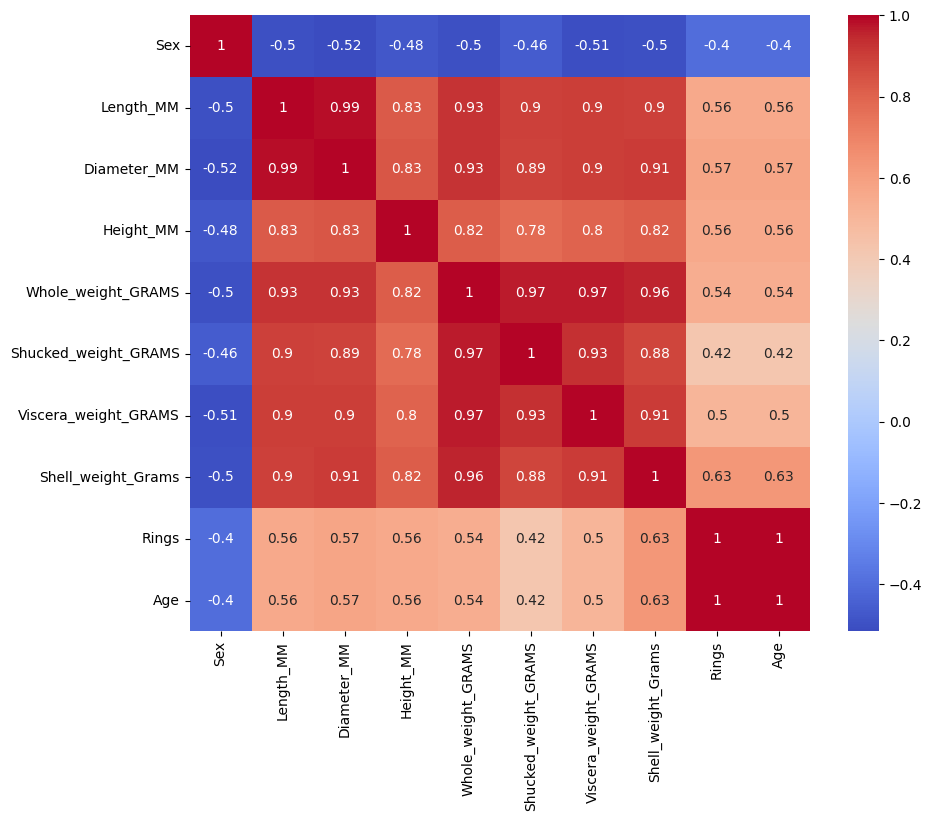

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a figure for the heatmap
plt.figure(figsize=(10,8))

# generate a correlation heatmap for all the numerical columns in the DataFrame
# df.corr() computes the correlation matrix
# annot = True displays the correlation values inside the cells
# cmap = "coolwarm" sets the color gradient
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

#display the heatmap
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
#fitting the data onto the model creating an instance of the linear regression model
lr = LinearRegression()

# fit the model using the training set
# the model will learn the relationship between features x_train and target y_train
lr.fit(X_train, y_train)

# use the trained model to make predictions on the validation set
lr_preds = lr.predict(X_val)

#calculate the Root Mean Squared Error to measure prediction accuracy
# RMSE is the square root of MSE (Mean Squared Error)
# lower values indicates better performance
lr_rmse = np.sqrt(mean_squared_error(y_val, lr_preds))

# Print RSME values for evaluation
print("RSME:", lr_rmse)


RSME: 2.133115657135413


Diameter_MM             12.893924
Height_MM                9.417147
Whole_weight_GRAMS       9.260684
Shell_weight_Grams       7.935335
Sex                     -0.356690
Length_MM               -0.734761
Viscera_weight_GRAMS    -9.813394
Shucked_weight_GRAMS   -20.554377
dtype: float64


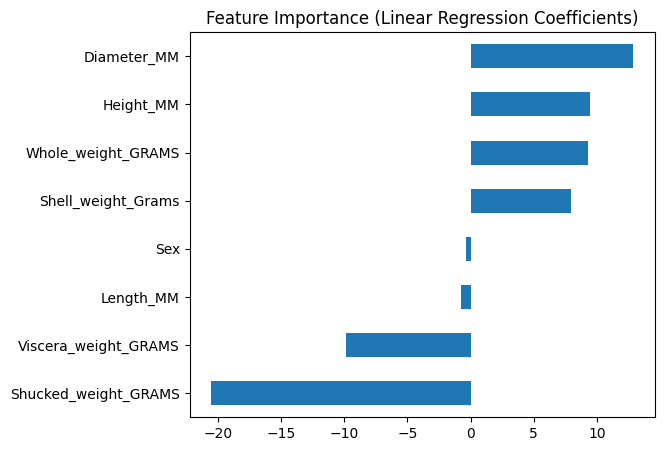

In [ ]:
#creating a visualation to show colinearity and feature influence in the linear regression model
#Extract the Learned coefficients from the trained linear regression model.
# each coefficient represents how strongly a feature influences the predicted age
coef = pd.Series(lr.coef_, index=X_train.columns)
print(coef.sort_values(ascending=False))

# plot the coeffiecients as a horizontal bar chart
# Helps visualize which features have the strongest positive or negative effects
coef.sort_values().plot(kind="barh", figsize=(6,5))

# title of the chart
plt.title("Feature Importance (Linear Regression Coefficients)")

# display the plot
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
# Scaling the data to improve model performance (especially for models sensitive to feature magnitude).
# StandardScaler transforms each feature so that:
# Mean = 0
# Standard deviation = 1
# This helps prevent large-valued features from dominating the learning process.

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler only on the training data to avoid data leakage.
# This calculates the mean and standard deviation from X_train.
scaler.fit(X_train)


# Transform the datasets using the scaler:
# Important: we apply the same fitted scaler to validation and test sets.
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create a new Linear Regression model
lr = LinearRegression()

# Train (fit) the model using the scaled training data
# The model learns the relationship between scaled features and the target variable
lr.fit(X_train_scaled, y_train)

# Use the trained model to make predictions on the scaled validation set
lr_preds = lr.predict(X_val_scaled)

# Predict on the **scaled training data** to evaluate training performance
train_preds = lr.predict(X_train_scaled)

# Calculate RMSE for the training set
# Lower RMSE indicates better fit; a very low value compared to validation may suggest overfitting
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))

# Calculate RMSE for the validation set
# This tells us how well the model generalizes to unseen data
val_rmse   = np.sqrt(mean_squared_error(y_val, lr_preds))

# Output RMSE values to compare model performance
print("Linear Regression RMSE: This model is off about", lr_rmse)
print("Train RMSE: This model is off about", train_rmse)
print("Validation RMSE: This model is off about", val_rmse)

Linear Regression RMSE: This model is off about 2.133115657135413
Train RMSE: This model is off about 2.2207009551453774
Validation RMSE: This model is off about 2.133115657135413


In [ ]:
#accuracy of Linear Regression on Validation and Test (scaled and unscaled)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

def evaluate_regression_model(model_name, model,
                              X_train, X_val, X_test,
                              y_train, y_val, y_test,
                              scaled=False):
    """
    Evaluate a regression model on train, validation, and test sets.
    Uses RMSE, MAE, and R² instead of accuracy/F1.
    """
    # If scaled=True, use the previously scaled feature sets.
    # else, use the raw feature sets.
    if scaled:
        Xtr, Xv, Xte = X_train_scaled, X_val_scaled, X_test_scaled
    else:
        Xtr, Xv, Xte = X_train, X_val, X_test

    # Predictions for each dataset
    y_pred_train = model.predict(Xtr)
    y_pred_val   = model.predict(Xv)
    y_pred_test  = model.predict(Xte)

    # Training metrics
    train_mse  = mean_squared_error(y_train, y_pred_train)
    train_rmse = math.sqrt(train_mse)
    train_mae  = mean_absolute_error(y_train, y_pred_train)
    train_r2   = r2_score(y_train, y_pred_train)

    # Validation metrics
    val_mse  = mean_squared_error(y_val, y_pred_val)
    val_rmse = math.sqrt(val_mse)
    val_mae  = mean_absolute_error(y_val, y_pred_val)
    val_r2   = r2_score(y_val, y_pred_val)

    # Test metrics
    test_mse  = mean_squared_error(y_test, y_pred_test)
    test_rmse = math.sqrt(test_mse)
    test_mae  = mean_absolute_error(y_test, y_pred_test)
    test_r2   = r2_score(y_test, y_pred_test)

    # print results
    print(f"===== {model_name} =====")
    print("Training:")
    print(f"  RMSE: {train_rmse:.4f}  MAE: {train_mae:.4f}  R²: {train_r2:.4f}")
    print("Validation:")
    print(f"  RMSE: {val_rmse:.4f}  MAE: {val_mae:.4f}  R²: {val_r2:.4f}")
    print("Test:")
    print(f"  RMSE: {test_rmse:.4f}  MAE: {test_mae:.4f}  R²: {test_r2:.4f}")
    print()


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score

# createa Decision Tree Regressor with default settings
# random state= 42 ensure reproducible results
dt_baseline = DecisionTreeRegressor(random_state=42)

# train the decision tree using the training data
dt_baseline.fit(X_train, y_train)

#Our Prediction on the validation set
dt_val_pred = dt_baseline.predict(X_val)

#The RMSE for the decision tree baseline
# Compute the RMSE for the baseline model
# RMSE helps us understand how far predictions are from actual values on average
dt_baseline_rmse = np.sqrt(mean_squared_error(y_val, dt_val_pred))

print("Baseline Decision Tree RMSE:", dt_baseline_rmse)

# Initialize tracking variables for the best model found so far.
# Start with an infinite score so any real RMSE will be lower.
best_score = float("inf")
best_params = None

# Define the hyperparameter search space:
# max_depth controls how deep the tree can grow (None = unlimited depth)
# min_samples_split is the minimum number of samples needed to split a node
# min_samples_leaf is the minimum number of samples required in each leaf
max_depth_list = [None, 3, 5, 7, 9]
min_samples_split_list = [2, 5, 10]
min_samples_leaf_list = [1, 2, 4]

# Exhaustive grid search through all combinations of hyperparameters
for depth in max_depth_list:
    for split in min_samples_split_list:
        for leaf in min_samples_leaf_list:
            # Create a Decision Tree model with the current set of hyperparameters
            dt_temp = DecisionTreeRegressor(
                random_state=42,          # ensures reproducible results
                max_depth=depth,          # how deep the tree can grow
                min_samples_split=split,  # minimum samples to split a node
                min_samples_leaf=leaf     # minimum samples allowed in each leaf
            )
            # Perform 5-fold cross-validation using RMSE as the evaluation metric.
            # cross_val_score returns NEGATIVE RMSE values, so we multiply by -1.
            scores = -cross_val_score(
                dt_temp,
                X_train,
                y_train,
                cv=5,
                scoring="neg_root_mean_squared_error"
            )
            # Compute the average RMSE across the 5 folds
            mean_rmse = np.mean(scores)

            # Check if this model is better, lower RMSE, than previous ones
            if mean_rmse < best_score:
                best_score = mean_rmse
                best_params = (depth, split, leaf)
# Print the best hyperparameters found and their corresponding RMSE
print("\n=== Decision Tree Regressor Tuning (Manual CV) ===")
print("Best params:", {
    "max_depth": best_params[0],
    "min_samples_split": best_params[1],
    "min_samples_leaf": best_params[2]
})
print(f"Best CV RMSE: {best_score:.4f}")

# Create a Decision Tree with specific hyperparameters
# These values typically come from hyperparameter tuning or random search
best_dt = DecisionTreeRegressor(
    random_state=42,
    max_depth=7,         # <-- you can change these numbers if your search chose others
    min_samples_split=5,
    min_samples_leaf=2,
)
# Train the tuned model on the same training data
best_dt.fit(X_train, y_train)

#hyperparameter tuning
# Evaluate the tuned model using your custom evaluation function
evaluate_regression_model(
    "Decision Tree Regressor (tuned)",
    best_dt,
    X_train, X_val, X_test,
    y_train, y_val, y_test,
    scaled=False
)


Baseline Decision Tree RMSE: 2.9914817929220914

=== Decision Tree Regressor Tuning (Manual CV) ===
Best params: {'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 4}
Best CV RMSE: 2.3890
===== Decision Tree Regressor (tuned) =====
Training:
  RMSE: 1.9264  MAE: 1.3663  R²: 0.6462
Validation:
  RMSE: 2.3231  MAE: 1.6351  R²: 0.4054
Test:
  RMSE: 2.3615  MAE: 1.6313  R²: 0.5044



In [ ]:
from sklearn.model_selection import train_test_split

# First split: Separate out the test set (15% of the entire dataset).
# X_temp and y_temp will contain the remaining 85% that will later be split
# into training and validation sets.
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42, shuffle=True)

# Second split: Divide the remaining 85% into training and validation sets.
# test_size=0.1765 is chosen because:
#   0.1765 × 0.85 = 0.15  meaning validation = 15% of total dataset
# Final proportions:
#   Training = 70%
#   Validation = 15%
#   Test = 15%
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42, shuffle=True)

print("Re-ran data splitting cells. X_train, X_val, X_test, y_train, y_val, y_test are now defined.")

Re-ran data splitting cells. X_train, X_val, X_test, y_train, y_val, y_test are now defined.


In [ ]:
from sklearn.preprocessing import StandardScaler

# scaling the data in order to get an improved RMSE
scaler = StandardScaler()

# Fit the scaler only on the training data
# This computes the mean and standard deviation for each feature.
# We do NOT fit on validation or test data to prevent data leakage.
scaler.fit(X_train)

# Apply the scaling transformation to each dataset.
# Note: transform() uses the parameters mean/std learned from the training data.
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("Re-ran data scaling cells. X_train_scaled, X_val_scaled, X_test_scaled are now defined.")

Re-ran data scaling cells. X_train_scaled, X_val_scaled, X_test_scaled are now defined.


Now you can re-run the cells for the Decision Tree Regressor and KNN Regressor.

Baseline KNN RMSE: 2.195384458052914
Best params: {'n_neighbors': 15, 'weights': 'distance'}
Best CV RMSE: 2.2624
===== KNN Regressor (tuned) =====
Training:
  RMSE: 0.0000  MAE: 0.0000  R²: 1.0000
Validation:
  RMSE: 2.0942  MAE: 1.5125  R²: 0.5168
Test:
  RMSE: 2.2599  MAE: 1.5395  R²: 0.5461


Tuned KNN Regressor Results
Validation RMSE: 2.094180236560055
Test RMSE: 2.2599391467004826


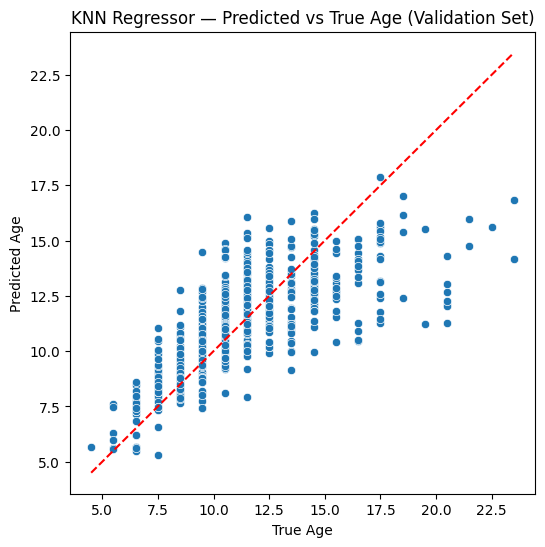

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a KNN regressor with k=5 neighbors
knn = KNeighborsRegressor(n_neighbors=5)

# Fit the model on the scaled training data
# KNN requires scaling because distance-based models are sensitive to feature magnitude
knn.fit(X_train_scaled, y_train)

# Predict on the scaled validation dataset
knn_preds = knn.predict(X_val_scaled)

# Compute RMSE to evaluate baseline performance
knn_rmse = np.sqrt(mean_squared_error(y_val, knn_preds))
print("Baseline KNN RMSE:", knn_rmse)

# Values to try for number of neighbors (k)
k_values = [3, 5, 7, 9, 11, 13, 15]

# Weighting method for neighbors:
# - "uniform": all neighbors contribute equally
# - "distance": closer neighbors contribute more
weight_options = ["uniform", "distance"]

# distance metrics could be tested too:
metric_options = ["euclidean", "manhattan"]

# Track the best RMSE score and parameters found
best_score = float("inf") # start with a very large number
best_params = None  # placeholder for best

# Loop through all k, weight combinations
knn_reg = KNeighborsRegressor()

for k in k_values:
    for w in weight_options:
      # Create a temporary KNN model for this combination
        knn_temp = KNeighborsRegressor(n_neighbors=k, weights=w)

        # Perform 5-fold cross-validation
        # neg_root_mean_squared_error is used, so multiply by -1 to get RMSE
        scores = -cross_val_score(
            knn_temp,
            X_train_scaled,
            y_train,
            cv=5,
            scoring="neg_root_mean_squared_error"
        )
        # Average RMSE across folds
        mean_rmse = np.mean(scores)

        # Update best parameters if this model performs better
        if mean_rmse < best_score:
            best_score = mean_rmse
            best_params = (k, w)

# Print best hyperparameters found
print("Best params:", {"n_neighbors": best_params[0], "weights": best_params[1]})
print(f"Best CV RMSE: {best_score:.4f}")

# Train Final Model Using Best Parameter
best_knn = KNeighborsRegressor(
    n_neighbors=best_params[0],
    weights=best_params[1]
)
# Fit final tuned model
best_knn.fit(X_train_scaled, y_train)

# Evaluate model using custom evaluation function
# Full Tuned model evaluation
evaluate_regression_model(
    "KNN Regressor (tuned)",
    best_knn,
    X_train, X_val, X_test,
    y_train, y_val, y_test,
    scaled=True
)

# Make predictions for additional reporting
val_preds = best_knn.predict(X_val_scaled)
test_preds = best_knn.predict(X_test_scaled)

# Compute RMSE for validation and test sets
val_rmse = np.sqrt(mean_squared_error(y_val, val_preds))
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))

print("\nTuned KNN Regressor Results")
print("Validation RMSE:", val_rmse)
print("Test RMSE:", test_rmse)

# Visualization: Predicted vs True Values
# Scatter plot comparing predicted age to true age for validation set
# Plot a diagonal reference line
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_val, y=val_preds)
plt.xlabel("True Age")
plt.ylabel("Predicted Age")
plt.title("KNN Regressor — Predicted vs True Age (Validation Set)")
plt.plot([y_val.min(), y_val.max()],
         [y_val.min(), y_val.max()],
         color='red', linestyle='--')
plt.show()

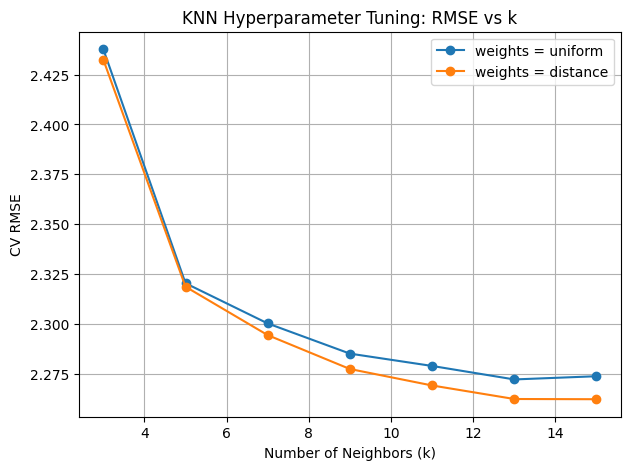

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
# Define the hyperparameter values to test for KNN
# k_values: different numbers of neighbors to evaluate
# weight_options: whether all neighbors are weighted equally ('uniform')
# or closer neighbors receive more weight ('distance')
k_values = [3, 5, 7, 9, 11, 13, 15]
weight_options = ["uniform", "distance"]

# Dictionary to store RMSE results for each weighting option
results = {w: [] for w in weight_options}

# Loop through each weighting option and each k value
for w in weight_options:
    for k in k_values:
      # Create a temporary KNN model with the current hyperparameters
        knn_temp = KNeighborsRegressor(n_neighbors=k, weights=w)

        # Perform 5-fold cross-validation to estimate performance
        # 'neg_root_mean_squared_error' returns negative RMSE,
        # so we multiply by -1 to convert it back to positive RMSE.
        scores = -cross_val_score(
            knn_temp,
            X_train_scaled,
            y_train,
            cv=5,
            scoring="neg_root_mean_squared_error"
        )
        # Store the average RMSE for this (k, weight) combination
        results[w].append(np.mean(scores))
# Plot RMSE across different k values for each weighting scheme
plt.figure(figsize=(7,5))
for w in weight_options:
    plt.plot(k_values, results[w], marker="o", label=f"weights = {w}")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("CV RMSE")
plt.title("KNN Hyperparameter Tuning: RMSE vs k")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

# Baseline Random Forest Regressor
# Create a Random Forest model using common baseline settings
rf = RandomForestRegressor(
    n_estimators = 200,
    random_state = 42,
    n_jobs = -1
)
# Train the model on the training data
rf.fit(X_train, y_train)
# Compute the RMSE for the baseline model
rf_val_preds = rf.predict(X_val)
rf_val_rmse = np.sqrt(mean_squared_error(y_val, rf_val_preds))

print("Baseline Random Forest RMSE:", rf_val_rmse)
# Manual Hyperparameter Tuning
#hyperparameter tuning
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
# Define the hyperparameter search space
n_estimators_list = [100, 200, 300]
max_depth_list = [None, 5, 10, 15]
min_samples_split_list = [2, 5, 10]
min_samples_leaf_list = [1, 2, 4]
max_features_list = [ "sqrt", "log2", None]
# Track the best results
best_score = float("inf")
best_params = None
# Exhaustive search through all combinations of parameters
for n in n_estimators_list:
    for depth in max_depth_list:
        for split in min_samples_split_list:
            for leaf in min_samples_leaf_list:
                for mf in max_features_list:
                     # Build a temporary Random Forest with chosen hyperparameters
                    rf_temp = RandomForestRegressor(
                        n_estimators=n,
                        max_depth=depth,
                        min_samples_split=split,
                        min_samples_leaf=leaf,
                        max_features=mf,
                        random_state=42,
                        n_jobs=-1
                    )

                    # Perform 5-fold cross-validation using RMSE as the metric.
                    # cross_val_score returns NEGATIVE RMSE values, so we multiply by -1.
                    scores = -cross_val_score(
                        rf_temp,
                        X_train,
                        y_train,
                        cv=5,
                        scoring="neg_root_mean_squared_error",
                        n_jobs=-1
                    )
                    # Average RMSE across 5 folds
                    mean_rmse = np.mean(scores)
                     # Update best score and parameters if current model is better
                    if mean_rmse < best_score:
                        best_score = mean_rmse
                        best_params = (n, depth, split, leaf, mf)

# Display best-found hyperparameters and RMSE
print("\n=== Random Forest Regressor Tuning (Manual CV) ===")
print("Best params:", {
    "n_estimators": best_params[0],
    "max_depth": best_params[1],
    "min_samples_split": best_params[2],
    "min_samples_leaf": best_params[3],
    "max_features": best_params[4]
})
print(f"Best CV RMSE: {best_score:.4f}")

# Train Final Model Using Best Hyperparameters
best_rf = RandomForestRegressor(
    n_estimators=best_params[0],
    max_depth=best_params[1],
    min_samples_split=best_params[2],
    min_samples_leaf=best_params[3],
    max_features=best_params[4],
    random_state=42,
    n_jobs=-1
)
# Fit the optimized Random Forest model
best_rf.fit(X_train, y_train)
# Evaluate final tuned model using your evaluation helper function
evaluate_regression_model(
    "Random Forest Regressor (tuned)",
    best_rf,
    X_train, X_val, X_test,
    y_train, y_val, y_test,
    scaled=False # Random Forest does NOT need scaled data
)

Baseline Random Forest RMSE: 2.0933077176939223


KeyboardInterrupt: 